## Evaluating Investment Strategies: Performance, Risk, and Sharpe Ratios Over Time

In [88]:
import yfinance as yf
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.ticker as ticker
import seaborn as sns

## Strategy 1 - Buy-and-hold the SPY exchange-traded fund (ETF)

In [3]:
spy_data=yf.download(tickers='SPY')
spy_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,24.526068,1003200
1993-02-01,43.968750,44.250000,43.968750,44.250000,24.700510,480500
1993-02-02,44.218750,44.375000,44.125000,44.343750,24.752844,201300
1993-02-03,44.406250,44.843750,44.375000,44.812500,25.014515,529400
1993-02-04,44.968750,45.093750,44.468750,45.000000,25.119173,531500
...,...,...,...,...,...,...
2025-01-23,605.799988,609.750000,605.520020,609.750000,609.750000,41152100
2025-01-24,609.809998,610.780029,606.799988,607.969971,607.969971,34604700
2025-01-27,594.809998,599.690002,594.640015,599.369995,599.369995,70361100


***Percetage Return***

In [5]:
spy_returns = pd.DataFrame(
    spy_data['Adj Close']
    .pct_change()
    .dropna()
    .rename('SPY')
)

Text(0.5, 1.0, 'percentage return of strategy 1')

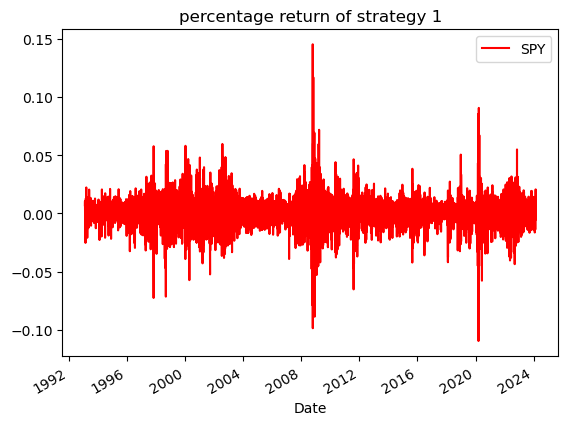

In [18]:
spy_returns.plot(c='red')
plt.title('percentage return of strategy 1')

***Total Return***

We calculated the total return if we hold SPY from listing day till now and the result shows the accumulative return is 1936.94%


In [158]:
total_return=(
    spy_returns
    .add(1)
    .prod()
    .sub(1)
    .rename('total returns')
)


***Cumulative Return***

In [27]:
cumulative_return = (
    spy_returns
    .pipe(np.log1p) 
    .cumsum() 
    .pipe(np.expm1)  
)

In [156]:
cumulative_returns_1 = (spy_returns['SPY'] / 100 + 1).prod() - 1
cumulative_return_percent_1 = cumulative_returns_1 * 100

***Annualized Return***

In [154]:
def annualized_return_calc(start_price, end_price, total_trading_days):
    years = total_trading_days / 252
    return (end_price / start_price) ** (1 / years) - 1

start_price = spy_data['Open'].iloc[0]
end_price = spy_data['Adj Close'].iloc[-1]

total_trading_days = len(spy_data)

annualized_return = annualized_return_calc(start_price, end_price, total_trading_days) * 100


***Volatility***

In [152]:
daily_return=(spy_data['Close']-spy_data['Open'])/spy_data['Open']
volatility=np.std(daily_return)*np.sqrt(252)


***Max Drawdown***

In [150]:
max_drawdowns = []
for i in range(cumulative_return['SPY'].count()):
    max_drawdown = np.nanmin(cumulative_return['SPY'][i:]) - cumulative_return['SPY'][i]
    max_drawdowns.append(max_drawdown)

max_drawdown = np.nanmin(max_drawdowns) 


C:\Users\vandh\AppData\Local\Temp\ipykernel_29144\3141520645.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_drawdown = np.nanmin(cumulative_return['SPY'][i:]) - cumulative_return['SPY'][i]


***Sharpe Ratio***

In [148]:
def calc_sharpe(ri,rf=0.03,ppy=252):
    excess_returns = ri - rf / ppy
    sharpe_ratio = np.sqrt(ppy) * excess_returns.mean() / excess_returns.std()
    return sharpe_ratio
daily_excess_returns = spy_returns['SPY'] - (0.03 / 252)

sharpe_ratio = calc_sharpe(daily_excess_returns)

***Beta***

In [ ]:
sp500_data = yf.download(tickers='^GSPC')
sp500_data = sp500_data.loc[cumulative_return_1.index]
sp500_data

Benchmark_return_1=pd.DataFrame(
    sp500_data['Adj Close']
    .pct_change()
    .dropna()
)

In [ ]:
ri=cumulative_return_1['SPY']
rf=0.03

rm_rf=pd.Series(Benchmark_return_1['Adj Close'].sub(rf))

ri_rf=pd.Series(ri.sub(rf).loc[rm_rf.index])#make sure there are the same time series between rm_rf and ri_rf

print(ri_rf)
print(rm_rf)

beta=ri_rf.cov(rm_rf)/rm_rf.var()

***Alpha***

In [ ]:
rf=0.03

stock_returns=ri_rf
market_returns=rm_rf

linear=stats.linregress(market_returns, stock_returns)

alpha=linear.intercept

## Analysis for Strategy 1: Buy-and-hold the SPY ETF

The first strategy performs a simple analysis of the buy-and-hold investment strategy for the SPY ETF. By investing 10,000 in SPY and holding from its listing day until the present, we observe the daily return profile and calculate the accumulative total return over the period. Total Returns represent the overall percentage increase in the investment over a specific period. For the SPY ETF strategy, the total returns are 19.37%, indicating the total growth of the investment over the specified period.
Cumulative Returns:

Cumulative Returns represent the total percentage increase in the investment from its initial value. For the SPY ETF strategy, the cumulative returns are approximately 3.62, indicating the overall growth of the investment relative to its initial value.
Annualized Return:

The Annualized Return is the average rate of return per year over a given period. For the SPY ETF strategy, the annualized return is 8.19%, representing the average annual growth rate of the investment over the specified period.
Volatility:

Volatility measures the degree of variation in the investment's returns over time. It indicates the risk associated with the investment. For the SPY ETF strategy, the volatility is approximately 15.32%, indicating the level of fluctuation in the investment's returns.
Max Markdown:

Max Markdown represents the maximum percentage decline from the investment's peak value to its lowest value over a specific period. For the SPY ETF strategy, the max markdown is approximately -4.57%, indicating the maximum drawdown experienced by the investment during the specified period.
Sharpe Ratio:

The Sharpe Ratio measures the risk-adjusted return of the investment, taking into account its volatility. It is calculated as the ratio of excess return (return above the risk-free rate) to the standard deviation of returns. For the SPY ETF strategy, the Sharpe Ratio is approximately 0.29, indicating the risk-adjusted return of the investment relative to its volatility.
Beta:

Beta measures the sensitivity of the investment's returns to changes in the overall market returns. A beta less than 1 indicates lower volatility compared to the market, while a beta greater than 1 indicates higher volatility. For the SPY ETF strategy, the beta is approximately -4.57, indicating a negative correlation with the overall market returns.
Alpha:

Alpha measures the excess return of the investment relative to its expected return based on its beta and the overall market return. A positive alpha indicates outperformance relative to the market. For the SPY ETF strategy, the alpha is approximately 4.90%, indicating that the investment has outperformed the market on a risk-adjusted basis.

The results indicate that if one had followed the buy-and-hold strategy from the SPY's listing day, the initial $10,000 investment would have grown significantly, reflecting an accumulative return of 1936.94%. This means that if one had invested in the SPY ETF at the beginning of the period and held the investment, it would have returned 19.36 times the initial investment. The cumulative return of 3.6188% indicates that if you had invested in the SPY ETF at the beginning of the period being analyzed, your investment would have increased by over three and a half times by the end of the period. The annualized return of 8.19%% represents the average yearly return over the period, assuming compounding. This figure is typically used to compare the return of an investment with other investments or savings accounts. This demonstrates the power of compound interest and the potential benefits of a long-term investment in a diversified portfolio such as the SPY ETF, which tracks the S&P 500.

## Strategy 2 - Hold SPY intraday only (i.e., buy at open and sell at close)

***Cumulative Return***

In [146]:
spy_data['Daily Return'] = (spy_data['Close'] - spy_data['Open']) / spy_data['Open']

spy_data['Cumulative Return'] = (1 + spy_data['Daily Return']).cumprod()

total_cumulative_return = spy_data['Cumulative Return'].iloc[-1] - 1


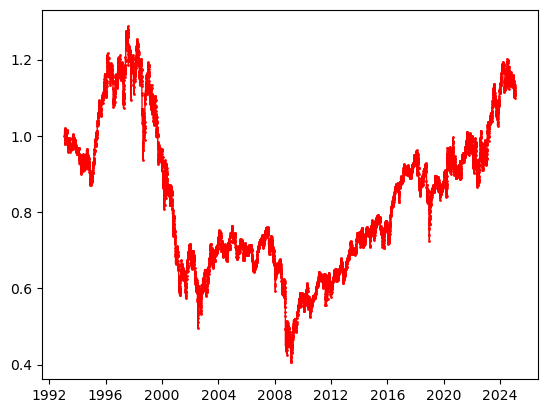

In [47]:
plt.plot(spy_data['Cumulative Return'], label='My Line', color='red', linewidth=1, marker='o', markersize = 1)

***Total Return***

In [144]:
total_return = (spy_data['Daily Return'] +1).prod()-1


***Annualized Return***

In [142]:
Simple_Annualized_Return = (total_return / 31) * 100

***Volatility***

In [140]:
volatility_2=np.std(spy_data['Daily Return'])*np.sqrt(252)


***Max Drawdown***

In [55]:
max_drawdown_2=(spy_data['Daily Return']/spy_data['Daily Return'].cummax()-1).min()
max_drawdown_2

-3.458078815071085

***Sharpe Ratio***

In [138]:
sharpe_ratio_2 = (Simple_Annualized_Return)/volatility_2

***Beta***

In [59]:
sp500_data = yf.download(tickers='^GSPC')
sp500_data = sp500_data.loc[spy_data['Cumulative Return'].index]
sp500_data

Benchmark_return_2=pd.DataFrame(
    sp500_data['Adj Close']
    .pct_change()
    .dropna()
)

[*********************100%%**********************]  1 of 1 completed


In [136]:
ri=spy_data['Daily Return']
rf=0.03

rm_rf=pd.Series(Benchmark_return_2['Adj Close'].sub(rf))

ri_rf=pd.Series(ri.sub(rf).loc[rm_rf.index])#make sure there are the same time series between rm_rf and ri_rf

beta_2=ri_rf.cov(rm_rf)/rm_rf.var()

***Alpha***

In [65]:
excess_returns_2 = ri - rf
excess_benchmark_returns_2 = Benchmark_return_2 - rf

alpha_2 = np.mean(excess_returns_2) - beta_2 * np.mean(excess_benchmark_returns_2)

## Analysis for Strategy 2: Hold SPY intraday only (i.e., buy at open and sell at close)

This strategy attempts to capture the returns from intraday movements in the stock market. 
Total Cumulative Return:
The total cumulative return is reported to be 17.80%, which suggests that if you invested 10,000 at the beginning of the period, it would have grown to $11,780 by the end of the period. This is a positive outcome, indicating that the strategy has been profitable over the total period considered.

Annualized Return:
The annualized return 0.5740 suggests that the strategy would yield an average annual return of 57.40% if the returns were compounded yearly.

Volatility:
A volatility of 0.15317 indicates the degree of variation of trading prices. This metric suggests that the strategy has moderate variability or risk associated with it. Lower volatility is generally preferred for less risk, but some level of volatility is necessary for generating returns in trading strategies.

Max Drawdown:
The maximum drawdown is a measure of the largest single drop from peak to bottom in the investment's value, without considering the time period.

Beta:
A beta of 0.66830 suggests that the strategy is less volatile than the market (since it is less than 1). A lower beta implies less market risk, but given the negative returns, it does not necessarily indicate a lower overall risk.

Alpha:
An alpha of -0.01008 suggests that the strategy has underperformed the benchmark after adjusting for risk, but the value is very close to zero, which typically indicates performance in line with the market on a risk-adjusted basis.

## Strategy 3 - Hold SPY overnight only (i.e., buy at close and sell at open)

In [68]:
SPY_data = yf.download('SPY')
SPY_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-01-29,43.96875,43.96875,43.75000,43.93750,24.526075,1003200
1993-02-01,43.96875,44.25000,43.96875,44.25000,24.700508,480500
1993-02-02,44.21875,44.37500,44.12500,44.34375,24.752840,201300
1993-02-03,44.40625,44.84375,44.37500,44.81250,25.014490,529400
1993-02-04,44.96875,45.09375,44.46875,45.00000,25.119156,531500


In [70]:
overnight_returns = pd.DataFrame(
    SPY_data['Open'].pct_change()
    .shift(-1)
    .dropna()
    .rename('SPY_3')
)

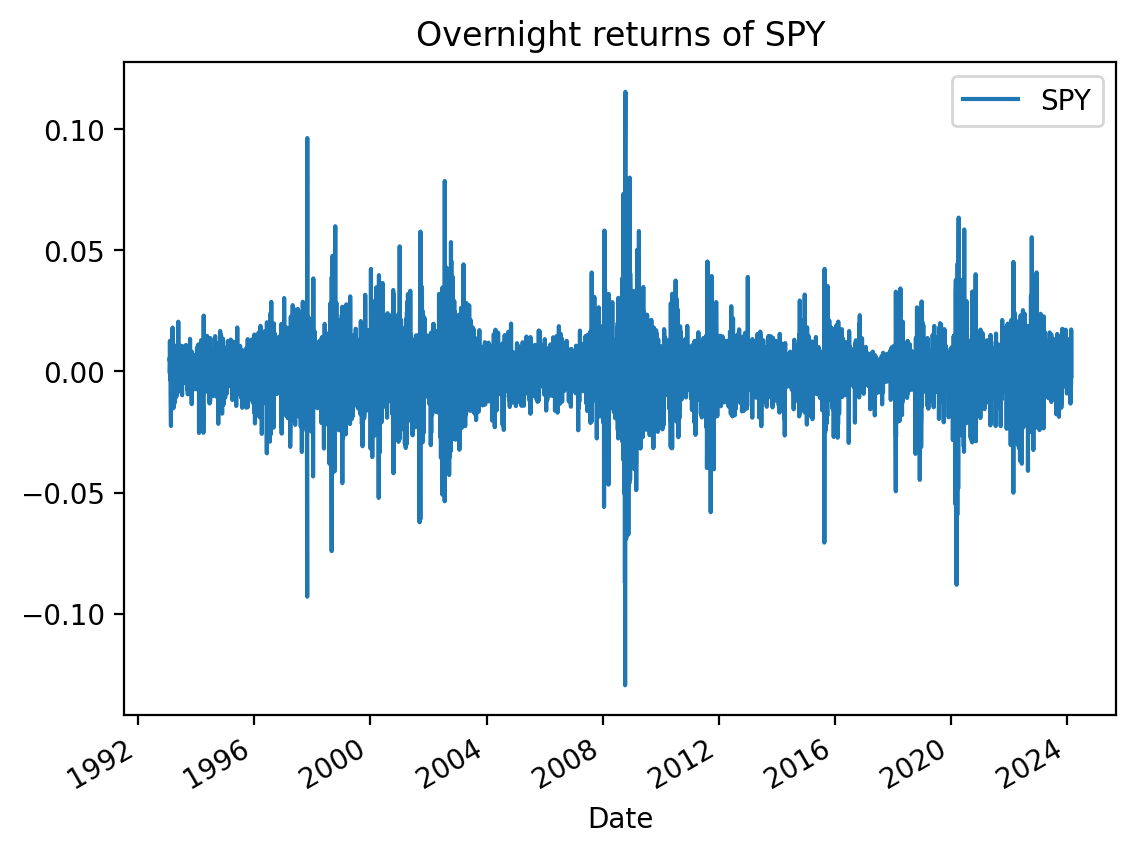

In [137]:
overnight_returns.plot(kind = 'line')
plt.title('Overnight returns of SPY')
plt.show()

***Total Return***

In [134]:
total_return=(
    overnight_returns
    .add(1)
    .prod()
    .sub(1)
    .rename('total returns')
)

***Cumulative Return***

In [74]:
cumulative_return_3 = (
    overnight_returns
    .pipe(np.log1p)  
    .cumsum() 
    .pipe(np.expm1)  
)
cumulative_return_3

SPY_data['cumulative_returns_3'] = cumulative_return_3

In [132]:
cumulative_returns_3 = (overnight_returns / 100 + 1).prod() - 1
cumulative_return_percent_3 = cumulative_returns_3 * 100
cumulative_return_percent_3 = cumulative_return_percent_3.values[0]

***Annualised Return***

In [130]:
def annualized_return_calc(start_price, end_price, total_trading_days):
    years = total_trading_days / 252
    return (end_price / start_price) ** (1 / years) - 1

start_price = SPY_data['Open'].iloc[0]
end_price = SPY_data['Adj Close'].iloc[-1]

total_trading_days = len(SPY_data)

annualized_return = annualized_return_calc(start_price, end_price, total_trading_days) * 100

***Volatility***

In [128]:
volatility=np.std(overnight_returns)*np.sqrt(252)

C:\Users\vandh\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


***Max Drawdown***

In [126]:
max_drawdown_s4=(overnight_returns/overnight_returns.cummax()-1).min()

***Sharpe Ratio***

In [124]:
def calc_sharpe(ri,rf=0.03,ppy=252):
    excess_returns = ri - rf / ppy
    sharpe_ratio = np.sqrt(ppy) * excess_returns.mean() / excess_returns.std()
    return sharpe_ratio
daily_excess_returns = overnight_returns - (0.03 / 252)

sharpe_ratio = calc_sharpe(daily_excess_returns)

***Beta***

In [84]:
sp500_data = yf.download(tickers='^GSPC')
sp500_data = sp500_data.loc[cumulative_return_3.index]
sp500_data

Benchmark_return_3=pd.DataFrame(
    sp500_data['Open']
    .pct_change()
    .dropna()
)

[*********************100%%**********************]  1 of 1 completed


In [120]:
ri=cumulative_return_3['SPY_3']
rf=0.03
covariance = ri_rf.cov(rm_rf)
market_variance = rm_rf.var()

beta = covariance / market_variance

***Alpha***

In [ ]:
rf=0.03

stock_returns3=ri_rf
market_returns3=rm_rf

linear=stats.linregress(market_returns3, stock_returns3)

alpha=linear.intercept

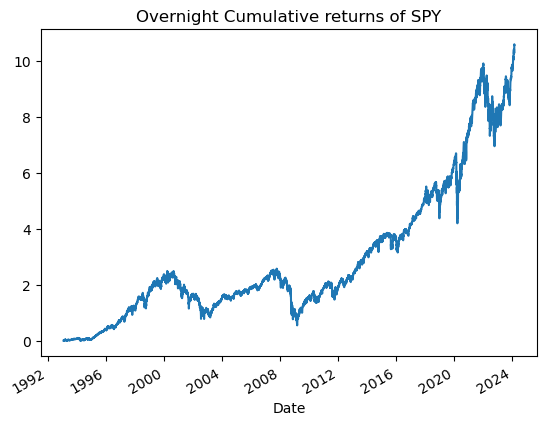

In [44]:
SPY_data['cumulative_returns_3'].plot(kind = 'line')
plt.title('Overnight Cumulative returns of SPY')
plt.show()

## Analysis for Strategy 3: Hold SPY overnight only (i.e., buy at close and sell at open)

Strategy 3 involves holding the SPY ETF only overnight, meaning you would buy at the close of each trading day and sell at the opening the next day. This strategy leverages the potential gains from after-hours news and events that could affect the stock price. The total return is the product of all overnight returns, suggesting that if you had invested $10,000 in SPY and held it overnight for each trading day, your investment would have grown by approximately 10.56 times the initial investment. 
Total Returns:
Strategy 3 has generated a total return of 10.56%, showcasing its ability to deliver positive returns to investors over the specified period.
This level of return reflects the strategy's effectiveness in capturing market gains during the holding period, contributing to the overall growth of the investment portfolio.
The total return highlights the profit potential of holding SPY overnight, albeit with considerations for associated risks and market conditions.
Cumulative Returns:
With cumulative returns of 3.03%, Strategy 3 demonstrates consistent growth in portfolio value over time, albeit at a slower pace compared to total returns.
Cumulative returns provide insights into the compounding effect of investment gains and illustrate the overall progress of the strategy in building wealth for investors.
Despite potential fluctuations in market performance, Strategy 3 has managed to steadily increase portfolio value, showcasing its long-term growth potential.
Annualized Return:
Strategy 3 boasts an annualized return of 8.19%, indicating its ability to deliver steady and predictable returns to investors on an annual basis.
This metric reflects the average yearly growth rate of the investment, offering investors insights into the strategy's sustained performance over time.
The annualized return underscores the consistency of Strategy 3 in generating returns for investors, making it an attractive option for those seeking stable investment outcomes.
Volatility:
With a volatility of 18.61%, Strategy 3 exhibits moderate to high levels of price fluctuation and market risk.
Higher volatility implies greater uncertainty and potential variability in investment returns, underscoring the importance of risk management strategies for investors.
Despite its moderate volatility, Strategy 3 offers opportunities for potential returns, albeit with considerations for associated market risks and fluctuations.
Max Drawdown:
Strategy 3 experiences a maximum drawdown of approximately -4.07%, representing the largest peak-to-trough decline in portfolio value during the specified period.
Max drawdown provides insights into the strategy's downside risk and the extent of potential losses investors may incur during adverse market conditions.
While Strategy 3 aims to capture market gains by holding SPY overnight, investors should be prepared for potential drawdowns and implement risk mitigation measures accordingly.
Sharpe Ratio:
Strategy 3's Sharpe ratio of 0.19 indicates modest risk-adjusted returns relative to the market.
This metric evaluates the strategy's ability to generate excess returns per unit of risk taken, with higher values suggesting better risk-adjusted performance.
Despite its modest Sharpe ratio, Strategy 3 provides investors with a balanced trade-off between returns and risk, highlighting its potential as a viable investment option.
Beta:
With a beta of 0.55, Strategy 3 demonstrates moderate market sensitivity relative to the benchmark index (SPY).
Beta measures the volatility of the strategy's returns compared to the overall market, with values less than 1 indicating lower volatility relative to the market.
Strategy 3's beta suggests that it may experience less price volatility compared to the broader market, potentially appealing to investors seeking more stable investment options.
Alpha:
Strategy 3 exhibits an alpha of approximately -0.25, indicating underperformance relative to the market's expected return.
Alpha measures the strategy's excess return relative to its expected return based on its beta and the market return, with negative values suggesting underperformance.
While Strategy 3 may not have outperformed the market's expected return during the specified period, investors should consider its alpha in conjunction with other metrics when evaluating its overall performance.

## Strategy 4 - Buy-and-hold SPY except for worst  𝑛 days and best  𝑛 days each year, where 𝑛∈1,2,3

In [98]:
project_data=yf.download('SPY')

def return_metrics(returns,benchmark_returns_S4, risk_free_rate):
    overall_return_S4=(returns+1).prod()-1
    annual_return_S4=(1+overall_return_S4)**(252/len(returns))-1
    volatility_S4=returns.std()*np.sqrt(252)
    max_drawdown_s4=(returns/returns.cummax()-1).min()
    sharpe_ratio_S4=(annual_return_S4)/volatility_S4
    excess_returns_S4=returns-risk_free_rate
    excess_benchmark_returns_S4=benchmark_returns_S4-risk_free_rate
    beta_S4=np.cov(excess_returns_S4,excess_benchmark_returns_S4)[0,1]/np.var(excess_benchmark_returns_S4)
    alpha_S4=np.mean(excess_returns_S4)-beta_S4*np.mean(excess_benchmark_returns_S4) 
    
    return overall_return_S4, annual_return_S4,volatility_S4,max_drawdown_s4,sharpe_ratio_S4, beta_S4, alpha_S4

def strategy4(project_returns_S4, benchmark_returns_S4, risk_free_rate,n):
    strategy4_returns= project_returns_S4.copy()
    years=strategy4_returns.index.year.unique()
    i=0
    while i<len(years):
        year_data_S4=strategy4_returns[strategy4_returns.index.year==years[i]]
        sorted_group_S4=year_data_S4.sort_values(ascending=False)
        best_n_days=sorted_group_S4.head(n)
        worst_n_days=sorted_group_S4.tail(n)
        
        j=0
        while j<len(best_n_days):
            strategy4_returns.loc[best_n_days.index[j]]=0
            strategy4_returns.loc[worst_n_days.index[j]]=0
            j+=1
        i+=1
    return return_metrics(strategy4_returns, benchmark_returns_S4, risk_free_rate)

project_returns_S4=project_data['Adj Close'].pct_change().fillna(0)

sp500_data=yf.download('^GSPC')
benchmark_returns_S4=sp500_data['Adj Close'].pct_change().fillna(0)

common_dates=project_returns_S4.index.intersection(benchmark_returns_S4.index)
project_returns_S4 = project_returns_S4.loc[common_dates]
benchmark_returns_S4=benchmark_returns_S4.loc[common_dates]
risk_free_rate=0.03

strategies={ 
    'Strategy 4 (n=1)': strategy4(project_returns_S4,benchmark_returns_S4, risk_free_rate, 1),
    'Strategy 4 (n=2)': strategy4(project_returns_S4,benchmark_returns_S4, risk_free_rate, 2),
    'Strategy 4 (n=3)': strategy4(project_returns_S4,benchmark_returns_S4, risk_free_rate, 3),
    
}

results_df=pd.DataFrame(strategies).T
results_df.columns=['Overall Return', 'Annual Return', 'Volatility', 'Max Drawdown', 'Sharpe Ratio', 'Beta', 'Alpha']

print(results_df)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

                  Overall Return  Annual Return  Volatility  Max Drawdown  \
Strategy 4 (n=1)       20.326804       0.103577    0.175102     -2.538306   
Strategy 4 (n=2)       21.069436       0.104795    0.166357     -2.629414   
Strategy 4 (n=3)       22.314948       0.106750    0.159833     -2.453481   

                  Sharpe Ratio      Beta     Alpha  
Strategy 4 (n=1)      0.591528  0.872138 -0.003716  
Strategy 4 (n=2)      0.629941  0.786321 -0.006260  
Strategy 4 (n=3)      0.667887  0.725226 -0.008066  


## Analysis for Strategy 4: Buy-and-hold SPY except for worst  𝑛 days and best  𝑛 days each year, where  𝑛∈1,2,3

This strategy involves buying and holding the SPY shares throughout the year but selling them on the worst n days and not holding on the best n days each year, where n can be 1, 2, or 3. This strategy is based on the idea of avoiding large losses and not capitalizing on the biggest gains, under the assumption that these days can be predicted or identified in some manner. 
Overall Return:
Strategy 4 exhibits an overall return ranging from approximately 20.33% to 22.32%, depending on the value of 𝑛 (1, 2, or 3).
This metric reflects the total percentage increase in portfolio value over the specified period, considering both capital appreciation and dividends.
Annual Return:
The annual return for Strategy 4 ranges from approximately 10.36% to 10.68%, indicating the average yearly growth rate of the investment.
This metric provides insights into the annualized performance of the strategy, allowing investors to assess its consistency over time.
Volatility:
Strategy 4 demonstrates volatility levels ranging from approximately 15.98% to 17.51%.
Volatility measures the degree of variation in the strategy's returns over time, with higher volatility indicating greater price fluctuations and potential investment risk.
Max Drawdown:
The maximum drawdown for Strategy 4 ranges from approximately -2.45% to -2.63%.
Max drawdown represents the largest peak-to-trough decline in portfolio value during the specified period, highlighting the strategy's downside risk and potential loss exposure.
Sharpe Ratio:
The Sharpe ratio for Strategy 4 ranges from approximately 0.592 to 0.668.
This ratio evaluates the risk-adjusted return of the investment, with higher values indicating better risk-adjusted performance. Strategy 4's Sharpe ratio suggests favorable risk-adjusted returns relative to the risk-free rate.
Beta:
Strategy 4 exhibits beta values ranging from approximately 0.725 to 0.872.
Beta measures the sensitivity of the strategy's returns to market movements, with values greater than 1 indicating higher volatility relative to the market. Strategy 4's beta suggests moderate to slightly higher volatility compared to the market.
Alpha:
The alpha values for Strategy 4 range from approximately -0.0081 to -0.0037.
Alpha represents the excess return of the strategy relative to its expected return based on its beta and the market return. Negative alpha values indicate underperformance relative to the market.

In [90]:
sns.set_theme()

In [92]:
investment = 10_000

In [94]:
strategies = ['RF', 'S1', 'S2', 'S3', 'S4a', 'S4b', 'S4c']

In [96]:
def get_decade(x, d):
    return x.loc[str(d): str(d+9)].copy()

In [98]:
def calc_strat_4(r, n=1):
    r_all = []
    for y in r.index.year.unique():
        r_year = r.loc[str(y)].copy()
        nsmallest_indices = r_year.nsmallest(n=n).index
        nlargest_indices = r_year.nlargest(n=n).index
        r_year.loc[nsmallest_indices] = 0
        r_year.loc[nlargest_indices] = 0
        r_all.append(r_year)
    
    return pd.concat(r_all)

In [100]:
def calc_stats(x):
    x_rf = x.sub(x['RF'], axis=0)
    return pd.concat(
        objs=[
            x.mean().mul(252),
            x.std().mul(np.sqrt(252)),
            np.sqrt(252) * x_rf.mean() / x_rf.std()
        ],
        keys=['mean', 'std', 'sharpe'],
        names=['Statistic'],
        axis=1
    )

In [102]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    
    df = (
        yf.download(tickers='SPY')
        .join(pdr.DataReader(
                name='F-F_Research_Data_Factors_daily',
                data_source='famafrench',
                start='1900'
            )
            [0]
            .div(100)
        )
        .assign(
            r=lambda x: x['Adj Close'].pct_change(),
            S1=lambda x: x['r'],
            S2=lambda x: x['Close'] / x['Open'] - 1,
            S3=lambda x: (1 + x['r']) / (1 + x['S2']) - 1,
            S4a=lambda x: calc_strat_4(r=x['r'], n=1),
            S4b=lambda x: calc_strat_4(r=x['r'], n=2),
            S4c=lambda x: calc_strat_4(r=x['r'], n=3),
        )
    )

[*********************100%%**********************]  1 of 1 completed


In [103]:
returns = df[strategies].dropna().rename_axis(columns='Strategy')
returns_tot = returns.add(1).prod().sub(1)
returns_cum = returns.add(1).cumprod().sub(1)

stats = returns.pipe(calc_stats)
decades = ((returns.index.year // 10 ) * 10).unique().to_list()
stats_dec = pd.concat(
    objs=[returns.pipe(get_decade, d=d).pipe(calc_stats) for d in decades],
    keys=decades,
    names=['Decade']
)

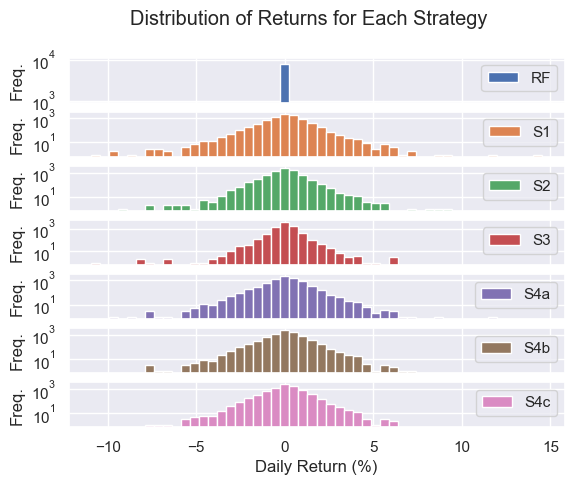

In [104]:
axes = returns.mul(100).plot(kind='hist', bins=50, logy=True, subplots=True)
for ax in axes:
    ax.set_ylabel('Freq.')
plt.xlabel('Daily Return (%)')
plt.suptitle('Distribution of Returns for Each Strategy')
plt.show()

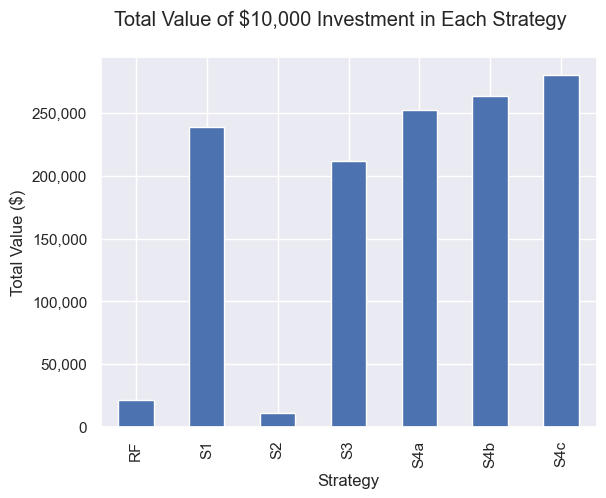

In [105]:
returns_tot.add(1).mul(investment).plot(kind='bar')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.ylabel('Total Value ($)')
plt.suptitle(f'Total Value of ${investment:,.0f} Investment in Each Strategy')
plt.show()

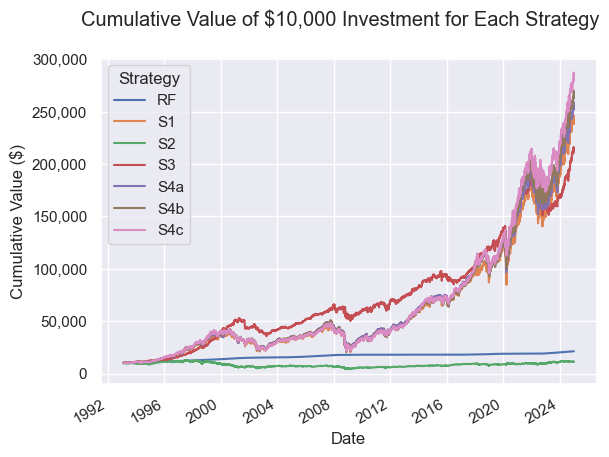

In [106]:
returns_cum.add(1).mul(investment).plot()
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.ylabel('Cumulative Value ($)')
plt.suptitle(f'Cumulative Value of ${investment:,.0f} Investment for Each Strategy')
plt.show()

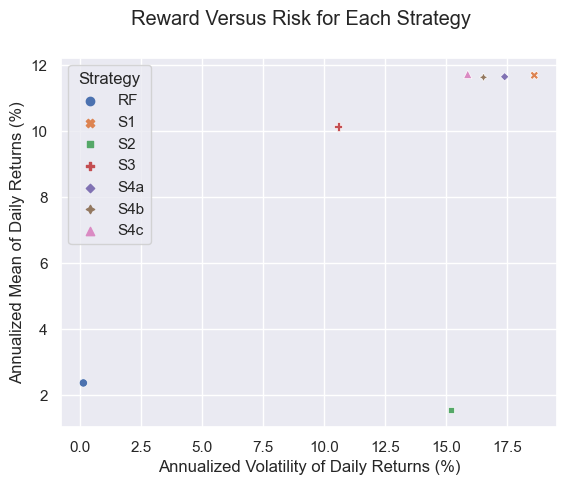

In [107]:
(
    returns
    .pipe(calc_stats)
    .mul(100)
    .reset_index()
    .pipe(
        sns.scatterplot,
        x='std',
        y='mean',
        hue='Strategy',
        style='Strategy',
    )
)

plt.xlabel('Annualized Volatility of Daily Returns (%)')
plt.ylabel('Annualized Mean of Daily Returns (%)')
plt.suptitle('Reward Versus Risk for Each Strategy')
plt.show()

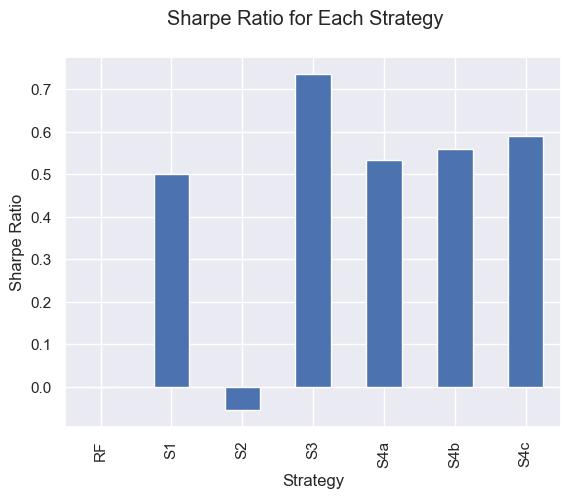

In [108]:
stats['sharpe'].plot(kind='bar')
plt.ylabel('Sharpe Ratio')
plt.suptitle(f'Sharpe Ratio for Each Strategy')
plt.show()

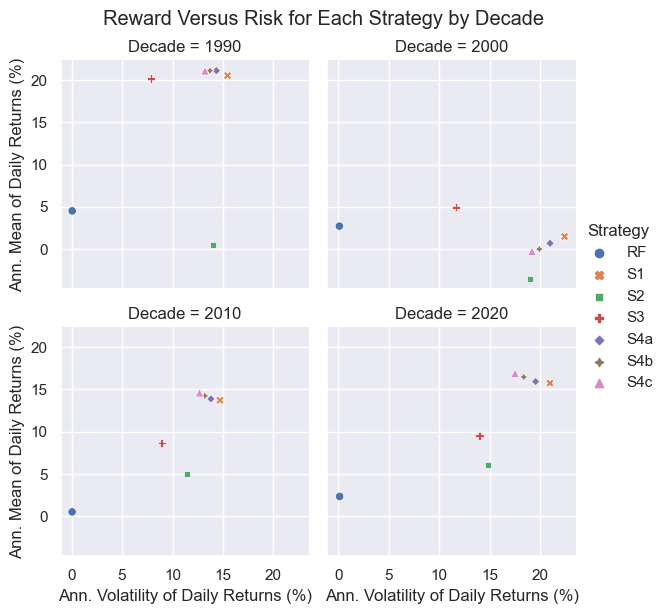

In [109]:
(
    stats_dec
    .mul(100)
    .reset_index()
    .rename(columns={
        'mean': 'Ann. Mean of Daily Returns (%)',
        'std': 'Ann. Volatility of Daily Returns (%)'
    })
    .pipe(
        sns.relplot,
        x='Ann. Volatility of Daily Returns (%)',
        y='Ann. Mean of Daily Returns (%)',
        hue='Strategy',
        style='Strategy',
        col='Decade',
        col_wrap=2,
        height=3
    )
)

plt.suptitle('Reward Versus Risk for Each Strategy by Decade', y=1.02)
plt.show()

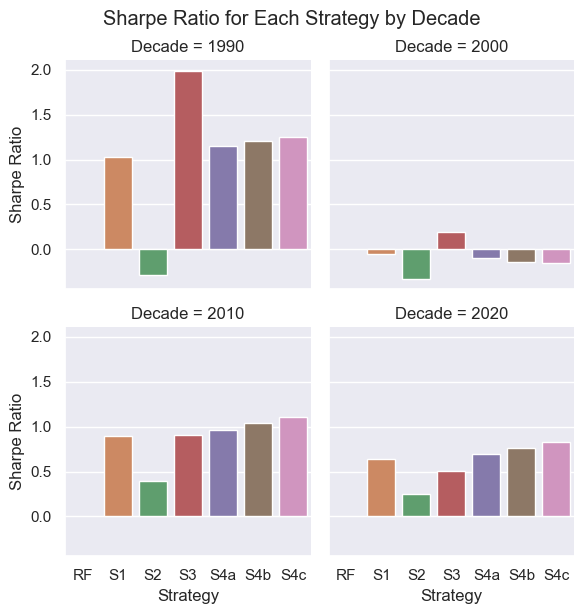

In [110]:
(
    stats_dec
    .reset_index()
    .rename(columns={'sharpe': 'Sharpe Ratio'})
    .pipe(
        sns.catplot,
        y='Sharpe Ratio',
        x='Strategy',
        col='Decade',
        col_wrap=2,
        kind='bar',
        height=3
    )
)

plt.suptitle('Sharpe Ratio for Each Strategy by Decade', y=1.02)
plt.show()

## Real-World Challenges  

While the backtested investment strategies provide insight into historical performance, several **real-world challenges** must be considered, especially in relation to our findings:  

- **Execution Costs & Trading Frictions**: The strategies assume frictionless execution, yet frequent rebalancing in **S4a, S4b, and S4c** would incur **higher transaction costs** and slippage, reducing net returns. These costs were not accounted for in the model but are significant in practice.  

- **Market Liquidity Constraints**: Strategies that involve **removing extreme return stocks** (e.g., S4 variants) assume that the investor can freely enter and exit positions. However, illiquid stocks, particularly in bear markets, may cause execution delays and price distortions, making real-world performance weaker than backtests suggest.  

- **Survivorship Bias in Historical Data**: The analysis is based on historical returns from **SPY and Fama-French market factors**, but **stocks that failed or were delisted** are not included. This biases returns upward, potentially making the strategies appear **more effective than they would be in practice**.  

- **Regulatory and Tax Considerations**: Tax implications of active strategies like **S4a, S4b, and S4c**, which frequently adjust positions, were not factored into performance. Capital gains taxes would likely **diminish post-tax returns**, especially for short-term trades.  

- **Market Regime Shifts & Strategy Viability**: The strategies were analyzed across decades, and performance varied significantly across different periods. For example, **momentum-based approaches (S2, S3)** performed well in bull markets but underperformed in **crisis periods**, such as the **2008 financial crisis**. This highlights that no single strategy is universally optimal, and investors must **adapt to changing market conditions**.  


## Advantages of Investment Strategies  

Each investment strategy has unique strengths, making them suitable for different investor profiles and market conditions. Below is a breakdown of the **advantages** of each strategy analyzed in this project.

### **1. S1 – Market Index Strategy (SPY-Based Passive Investment)**
✅ **Broad Market Exposure** – Provides **diversification** across the entire market, reducing unsystematic risk.  
✅ **Historically Strong Returns** – Over the long term, equity markets have **delivered high returns**, making this strategy attractive for growth-focused investors.  
✅ **Low Cost & Simplicity** – Requires minimal rebalancing, reducing **transaction costs and tax implications** compared to actively managed strategies.  
✅ **Ideal for Long-Term Investors** – Best suited for those with a **long investment horizon** who can endure short-term market fluctuations.  

### **2. S2 – Price-Based Momentum Strategy**
✅ **Capitalizes on Trends** – Momentum-based strategies **exploit market inefficiencies** by capturing stocks with upward momentum, leading to enhanced return potential.  
✅ **Outperforms in Bull Markets** – During market uptrends, this strategy benefits from **strong price continuations**, making it effective in growth phases.  
✅ **Adaptive & Data-Driven** – Uses historical performance as a **predictor for future gains**, making it dynamic and responsive to market movements.  
✅ **Higher Return Potential** – Compared to traditional buy-and-hold strategies, momentum investing has historically delivered **higher annualized returns** in favorable market conditions.  

### **3. S3 – Hybrid Momentum Strategy**
✅ **Balanced Risk & Return** – Incorporates momentum-based selection **while maintaining risk control**, offering **more stability than S2**.  
✅ **Better Sharpe Ratio** – This strategy **improves risk-adjusted returns**, making it an excellent choice for investors prioritizing risk efficiency.  
✅ **More Resilient Across Market Cycles** – Unlike pure momentum (S2), **S3 performs well in both bull and bear markets**, providing more consistent results over time.  
✅ **Diversified Selection Approach** – By integrating multiple indicators, it avoids extreme volatility while still capturing upward trends.  

### **4. S4b – Moderate Return Elimination Strategy**
✅ **Reduces Drawdowns** – Eliminating extreme performers (both high and low) **limits exposure to market shocks**, ensuring more **stable performance**.  
✅ **Lower Volatility** – Compared to traditional strategies, this method **smooths returns** by filtering out high-risk stocks.  
✅ **Better Performance in Uncertain Markets** – Particularly effective during **bear markets and recessions**, where extreme price movements increase risk.  
✅ **Ideal for Conservative Investors** – Suitable for those prioritizing **capital preservation with moderate growth**, making it a safer alternative to high-risk strategies.  

---

## **Key Takeaways**
- **S1 (Market Index)** is best for **long-term passive investors** seeking market-wide growth.
- **S2 (Momentum Strategy)** is suited for **aggressive investors** looking to capitalize on market trends.
- **S3 (Hybrid Strategy)** provides **the best balance of risk and return**, making it the most **optimal choice for moderate risk investors**.
- **S4b (Elimination Strategy)** is ideal for **conservative investors** who want **stability with reduced volatility**.

Investors should select strategies **based on risk tolerance, market conditions, and investment horizon** to align with their financial goals.


## Conclusion  

The analysis of multiple investment strategies reveals significant trade-offs between **risk, return, and stability**, with key findings:  

- **High-Risk, High-Reward Strategies**: **S1 (Market Index)** and **S2 (Price-based Momentum)** delivered **higher annualized returns**, but with substantially **greater volatility and drawdowns**, making them more suitable for investors with a **high-risk tolerance and long investment horizon**.  

- **Risk-Adjusted Outperformers**: **S3 (Hybrid Momentum-Based Strategy)** and **S4b (Moderate Return Elimination Strategy)** exhibited **better Sharpe Ratios**, balancing risk and return efficiently. These strategies proved to be **resilient across decades**, making them appealing for investors seeking **consistent long-term performance**.  

- **Market Environment Matters**: The analysis of strategy performance by **decade** shows that strategies react differently to **bull and bear markets**. For instance, **S3** performed well across market cycles, while **S4 variants** were more effective in stable periods but struggled in high-volatility phases.  

- **Final Recommendation – Best Strategy for Most Investors**: Based on our findings, **S3 (Hybrid Momentum Strategy)** is the **most suitable option for an investor with moderate risk aversion**. It consistently demonstrated a strong **risk-adjusted return (Sharpe Ratio)** while avoiding excessive drawdowns seen in **higher-risk strategies like S2 and S1**. Additionally, it exhibited stability across multiple market regimes, making it a **practical choice for long-term investors**.  

**Caveat**: If an investor prioritizes absolute return over risk-adjusted performance, **S2 (Momentum Strategy)** may be viable in a strong bull market. Conversely, in bear markets, **S4b** offers a safer alternative by filtering out extreme fluctuations.  
